# Análise dos Dados Duplicados + Clusterização

**Objetivo:** Analisar os dados duplicados e em seguida aplcar o método de clusterização na base tratada.  

---

### **Plano de Ação** 

 
1.   **Checa TODAS as colunas, Pq eu vi que tinha coluna repetida, O Maurício pegou algumas, Mas eu vi que tem mais.**

2.   **Mede a correlação linear entre as variáveis NUMÉRICAS apenas e dropa oq tiver correlação maior que 0.9.**

3.   **(1º mais importante): fazer a média/moda por ano dos PPGs. Ou seja, groupby Ano+Código PPG.**

        *Porquê isso? Pq o dado está ao longo de 4 anos e cada ppg aparece 4 vezes. Daí eu não vejo muito sentido em               continuar clusterizando ppgs "repetidos" com anos diferentes. Quando eu digo "moda", me refiro a pegar o valor             mais frequente das variáveis categóricas. Pq não tem como tirar média de variável categórica, só numérica.*

4.  **(2º mais importante): além de fazer a estratégia da média, peguem só os dados do último ano (acho que é 2017) e apliquem a clusterização só nesses dados. Ou seja, clusterização só com os PPGs no ano de 2017. Depois, comparem os resultados entre si. Podem comparar visualmente e talvez pegando alguns PPGs aleatórios para olhar a diferença de features e clusters**



## Parte 0: Imports + Renomeações + Verificações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df= pd.read_csv('https://github.com/ieee-uerj/capes-data-analysis/raw/main/data/Grande_Base_3.csv' , encoding='latin1')

#Grande Base 3

#### Verificações sobre a integridade da base analisada


In [4]:
df['CD_PROGRAMA_IES'].unique().shape    #Verificações se o número de prgramas de pos-graduação está próximo do real. 

(3989,)

In [5]:
df['CD_PROGRAMA_IES'].describe()     

count             20141
unique             3989
top       10001018002P1
freq                  6
Name: CD_PROGRAMA_IES, dtype: object

In [6]:
df.query("CD_PROGRAMA_IES == '10001018002P1'")   #Verificação se têm dados duplicados nesse programa em particular.  

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,10001018002P1,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,TESE,0.0,NaN,0,21,15,10,25,0,25,1967.560000,UNIR,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,NaN,FEDERAL,1981.000000,NORTE,RO,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.0,0,13,14,8,22,0,22,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,20,14,8,22,0,22,1971.136364,UNIR,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,NaN,FEDERAL,1984.311111,NORTE,RO,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,18,13,7,20,0,20,1972.200000,UNIR,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,NaN,FEDERAL,1986.493827,NORTE,RO,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,TESE,1.0,NaN,0,21,14,8,22,0,22,1973.727273,UNIR,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,NaN,FEDERAL,1987.579439,NORTE,RO,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4
5,10001018002P1,2018,9,4,18,6,12,18,0,14,3,1,18,0,16,2,11,7,0,0,0,2,4.0,2.0,TESE,1.0,NaN,0,15,12,6,18,0,18,1975.388889,UNIR,37,54,89,2,13.138584,5.055556,91,0.406593,2.411661,37.733333,NaN,FEDERAL,1988.527473,NORTE,RO,4,17964,1,62,55.0,7.0,53,6.0,47.0,0.0,1,3


Legenda: 

- SG : Sigla
- CD : Código
- AN : Ano
- IN : Indicador
- NM : Nome

***legenda para facilitar de leitura das informações de cada coluna*** 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_PROGRAMA_IES              20141 non-null  object 
 1   AN_BASE                      20141 non-null  int64  
 2   CD_AREA_AVALIACAO            20141 non-null  int64  
 3   CONCEITO_PROGRAMA            20141 non-null  int64  
 4   IB_Total_docentes            20141 non-null  int64  
 5   IB_Mulheres                  20141 non-null  int64  
 6   IB_Homens                    20141 non-null  int64  
 7   IB_Brasileiros               20141 non-null  int64  
 8   IB_Estrangeiros              20141 non-null  int64  
 9   IB_QTDE_Regime_Parcial       20141 non-null  int64  
 10  IB_QTDE_Regime_Integral      20141 non-null  int64  
 11  IB_QTDE_Regime_Exclusivo     20141 non-null  int64  
 12  IB_QTDE_Prof_Doutor          20141 non-null  int64  
 13  IB_QTDE_Prof_Nao

In [8]:
#Renomeando colunas
 
df = df.rename(columns={'OUTRO AUXÃÂLIO FINANCEIRO': 'UF_OUTRO AUXILIO FINANCEIRO'})
df = df.rename(columns={'SEM AUXÃÂLIO': 'SEM AUXILIO'})
df = df.rename(columns={'NM_MODALIDADE_PROGRAMA': 'UF_NM_MODALIDADE_PROGRAMA'})
df = df.rename(columns={'Qtd_Proj': 'UF_Qtd_Proj'})
df = df.rename(columns={'N_PESQUISA': 'UF_Pesquisas'})
df = df.rename(columns={'Outros projetos': 'UF_Outros projetos'})
df = df.rename(columns={'Qtd_Financiadores': 'UF_Qtd_Financiamentos'})
df = df.rename(columns={'BOLSA': 'UF_BOLSA'})
df = df.rename(columns={'PÃÂBLICA_OU_PRIVADA': 'UF_DS_DEPENDENCIA_ADMINISTRATIVA'})
df = df.rename(columns={'QTD_FINANCIADORES': 'UF_QTD_FINANCIADORES'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CD_PROGRAMA_IES                   20141 non-null  object 
 1   AN_BASE                           20141 non-null  int64  
 2   CD_AREA_AVALIACAO                 20141 non-null  int64  
 3   CONCEITO_PROGRAMA                 20141 non-null  int64  
 4   IB_Total_docentes                 20141 non-null  int64  
 5   IB_Mulheres                       20141 non-null  int64  
 6   IB_Homens                         20141 non-null  int64  
 7   IB_Brasileiros                    20141 non-null  int64  
 8   IB_Estrangeiros                   20141 non-null  int64  
 9   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 10  IB_QTDE_Regime_Integral           20141 non-null  int64  
 11  IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 12  IB_Q

# Parte 1. Checando a correlação das colunas 




Colunas hipoteticamente iguais 
 
 - GUS_Do_Homens : IB_Homens 
 - GUS_Do_Mulheres : IB_Mulheres
 - GUS_Do_Brasileiros : IB_Brasileiros
 - GUS_Do_Estrangeiros : IB_Estrangeiros
 - GUS_Quantidade_Docentes : IB_Total_docentes
 - UF_BOLSA : IB_Profs_BolsaDeFixacao
 - CONCEITO_PROGRAMA : CD_CONCEITO_PROGRAMA
 - Qtd_Proj : N_PESQUISA
 - Qtd_Financiadores : Qtd_FINANCIADORES


In [10]:
import scipy 

In [11]:
#Função p/ medir a correlação entre duas colunas. 
def Cor(x, y):
  slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
  return r_value

In [12]:
Cor(df['GUS_Do_Homens'], df['IB_Homens'])

1.0

In [13]:
Cor(df['GUS_Do_Mulheres'], df['IB_Mulheres'])

0.9999994699622308

In [14]:
Cor(df['GUS_Do_Brasileiros'], df['IB_Brasileiros'])

1.0

In [15]:
Cor(df['GUS_Do_Estrangeiros'],df['IB_Estrangeiros'])


1.0

In [16]:
Cor(df['GUS_Quantidade_Docentes'], df['IB_Total_docentes'])

1.0

In [17]:
Cor(df['UF_BOLSA'],df['IB_Profs_BolsaDeFixacao'])

0.012657101340777145

In [18]:
Cor(df['CD_CONCEITO_PROGRAMA'], df['CONCEITO_PROGRAMA'])

1.0

In [19]:
Cor(df['UF_Qtd_Proj'], df['UF_Pesquisas'])

0.9896454236792632

In [20]:
Cor(df['UF_Qtd_Financiamentos'],df['UF_QTD_FINANCIADORES'])

0.3492455321258009

## Parte 2. Dropando as Colunas com correlação maior que 0.9 



In [21]:
df = df.drop('GUS_Do_Homens', 1)
df = df.drop('GUS_Do_Mulheres', 1)
df.drop('GUS_Do_Brasileiros', 1,inplace=True)
df.drop('GUS_Quantidade_Docentes', 1,inplace=True)
df.drop('GUS_Do_Estrangeiros', 1,inplace=True)
df.drop('CONCEITO_PROGRAMA', 1,inplace=True)
df.drop('UF_Pesquisas', 1,inplace=True)
df.drop('Unnamed: 0', 1, inplace=True) #Erro quando juntou as bases

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except 

In [22]:
#Verificando se foram dropadas. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CD_PROGRAMA_IES                   20141 non-null  object 
 1   AN_BASE                           20141 non-null  int64  
 2   CD_AREA_AVALIACAO                 20141 non-null  int64  
 3   IB_Total_docentes                 20141 non-null  int64  
 4   IB_Mulheres                       20141 non-null  int64  
 5   IB_Homens                         20141 non-null  int64  
 6   IB_Brasileiros                    20141 non-null  int64  
 7   IB_Estrangeiros                   20141 non-null  int64  
 8   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 9   IB_QTDE_Regime_Integral           20141 non-null  int64  
 10  IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 11  IB_QTDE_Prof_Doutor               20141 non-null  int64  
 12  IB_Q

In [23]:
from pathlib import Path  
filepath = Path('drive/My Drive/Colab Notebooks/2_GIA/Analise_bases/Grande Base 4.csv')  #caminho onde gerei a Grande_Base_4  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath, index=False) #index=False para evitar a criação da coluna Unamed. 

## Parte 3:  Média/Moda por ano dos PPG's

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20141 entries, 0 to 20140
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CD_PROGRAMA_IES                   20141 non-null  object 
 1   AN_BASE                           20141 non-null  int64  
 2   CD_AREA_AVALIACAO                 20141 non-null  int64  
 3   IB_Total_docentes                 20141 non-null  int64  
 4   IB_Mulheres                       20141 non-null  int64  
 5   IB_Homens                         20141 non-null  int64  
 6   IB_Brasileiros                    20141 non-null  int64  
 7   IB_Estrangeiros                   20141 non-null  int64  
 8   IB_QTDE_Regime_Parcial            20141 non-null  int64  
 9   IB_QTDE_Regime_Integral           20141 non-null  int64  
 10  IB_QTDE_Regime_Exclusivo          20141 non-null  int64  
 11  IB_QTDE_Prof_Doutor               20141 non-null  int64  
 12  IB_Q

In [25]:
#Função para calcular a moda dos numeros e das strings. 
def moda(List):
    List=list(List)
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

In [26]:
df.head(2)

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,UF_NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,SEM AUXILIO,UF_DS_DEPENDENCIA_ADMINISTRATIVA,UF_QTD_FINANCIADORES
0,10001018002P1,2013,9,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,TESE,0.0,NaN,0,21,1967.560000,UNIR,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,NaN,FEDERAL,1981.000000,NORTE,RO,3,1,19,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.0,0,13,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,1,26,3.0,20,1.0,19.0,0.0,1,3


In [27]:
df_programa=df.groupby(['CD_PROGRAMA_IES'],as_index=False).agg({'AN_BASE':moda,'IB_Total_docentes':np.mean, 'IB_Mulheres':np.mean, 'IB_Homens': np.mean,
                                                                 'IB_Brasileiros': np.mean, 'IB_Estrangeiros': np.mean, 'IB_QTDE_Regime_Parcial': np.mean,
                                                                 'IB_QTDE_Regime_Integral': np.mean, 'IB_QTDE_Regime_Exclusivo': np.mean, 'IB_QTDE_Prof_Doutor': np.mean, 'IB_QTDE_Prof_NaoDoutor': np.mean,
                                                                 'IB_QTDE_titulados_Brasil': np.mean,'IB_QTDE_titulados_Exterior': np.mean, 'IB_Profs_Colaboradores': np.mean, 'IB_Profs_ServidoresPublicos': np.mean,
                                                                 'IB_Profs_VinculoCLT': np.mean, 'IB_Profs_Aposentados': np.mean, 'IB_Profs_BolsaDeFixacao' : np.mean,  'IB_Total_cursos': np.mean,
                                                                 'GUS_Lingua_estrangeira': np.mean, 'AN_NASCIMENTO_DOCENTE': np.mean, 'GUS_Dis_Homens': np.mean, 'GUS_Dis_Mulheres': np.mean, 'GUS_Dis_Brasileiros': np.mean,
                                                                 'GUS_Dis_Estrangeiros': np.mean, 'GUS_diferenca_idade': np.mean, 'GUS_razao_aluno_prof': np.mean, 'GUS_Quantidade_Discentes': np.mean, 'GUS_Dis_Prop_Homens': np.mean,"GUS_Dis_Aluno_Tempo": np.mean, 
                                                                 "QT_MES_TITULACAO": np.mean, "GUS_pag_por_aluno": np.mean, "CS_STATUS_JURIDICO": moda, "AN_NASCIMENTO_DISCENTE": np.mean, 
                                                                 "NM_REGIAO": moda, "SG_UF_PROGRAMA": moda, "CD_CONCEITO_PROGRAMA": moda, "UF_Qtd_Proj": np.mean, 
                                                                 "UF_Outros projetos": np.mean, "UF_Qtd_Financiamentos": np.mean, "UF_BOLSA": np.mean, "UF_OUTRO AUXILIO FINANCEIRO": np.mean,  
                                                                 "CD_AREA_AVALIACAO": moda,"ID_SUBTIPO_PRODUCAO": moda,"NM_SUBTIPO_PRODUCAO": moda, 
                                                                 "SG_ENTIDADE_ENSINO": moda,"CS_STATUS_JURIDICO": moda, "NM_REGIAO": moda,"SG_UF_PROGRAMA": moda,"CD_CONCEITO_PROGRAMA": moda,"SEM AUXILIO": moda})

In [28]:
df_programa.head()

,CD_PROGRAMA_IES,AN_BASE,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,GUS_Lingua_estrangeira,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,UF_Qtd_Proj,UF_Outros projetos,UF_Qtd_Financiamentos,UF_BOLSA,UF_OUTRO AUXILIO FINANCEIRO,CD_AREA_AVALIACAO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,SG_ENTIDADE_ENSINO,SEM AUXILIO
0,10001018002P1,2013,21.5,7.833333,13.666667,21.500000,0.000000,15.166667,5.166667,1.166667,21.5,0.0,19.500000,2.000000,11.666667,8.000000,0.333333,1.500000,0.0,2.0,0.0,1971.161178,32.666667,53.166667,84.666667,1.166667,14.036690,4.046077,85.833333,0.379041,2.670821,32.958669,3.636364,FEDERAL,1985.197869,NORTE,RO,3,40.166667,4.500000,33.000000,2.833333,30.166667,9,2.0,TESE,UNIR,0.0
1,10001018004P4,2013,31.0,8.166667,22.833333,31.000000,0.000000,2.666667,25.500000,2.833333,31.0,0.0,30.000000,1.000000,2.000000,20.166667,8.500000,0.333333,0.0,2.0,0.0,1966.534843,24.500000,40.666667,64.666667,0.500000,15.429744,2.137071,65.166667,0.379225,2.221723,30.077689,3.100769,FEDERAL,1981.964587,NORTE,RO,4,41.833333,1.500000,23.833333,0.000000,23.833333,45,2.0,DISSERTAÇÃO,UNIR,0.0
2,10001018005P0,2013,16.5,6.000000,10.500000,15.333333,1.166667,3.166667,8.666667,4.666667,16.5,0.0,15.166667,1.333333,3.166667,11.666667,1.666667,0.000000,0.0,2.0,0.0,1964.415424,30.833333,45.166667,75.000000,1.000000,15.948625,4.581545,76.000000,0.396042,2.598205,29.926197,8.723803,FEDERAL,1980.364049,NORTE,RO,4,31.833333,4.333333,9.000000,1.333333,7.666667,36,2.0,DISSERTAÇÃO,UNIR,0.0
3,10001018006P7,2013,11.5,4.333333,7.166667,11.500000,0.000000,0.500000,6.500000,4.500000,11.5,0.0,8.666667,2.833333,0.000000,11.500000,0.000000,0.000000,0.0,1.0,0.0,1960.100460,32.500000,19.166667,51.666667,0.000000,21.870891,4.574106,51.666667,0.625704,1.996392,25.865931,9.478521,FEDERAL,1981.971351,NORTE,RO,4,12.833333,0.500000,2.000000,0.666667,1.333333,27,2.0,DISSERTAÇÃO,UNIR,0.0
4,10001018008P0,2013,17.0,9.000000,8.000000,15.000000,2.000000,0.000000,0.000000,17.000000,16.0,1.0,9.000000,8.000000,0.000000,13.000000,4.000000,0.000000,0.0,1.0,0.0,1957.294118,12.000000,29.000000,41.000000,0.000000,17.437590,2.411765,41.000000,0.292683,1.173401,34.941176,9.930796,FEDERAL,1974.731707,NORTE,RO,2,15.000000,0.000000,9.000000,4.000000,5.000000,41,2.0,DISSERTAÇÃO,UNIR,0.0


## Parte 4:  Clusterização e comparação

In [29]:
#slice para aplicar a clusterização somente no ano de 2017.
df_2017 = df_programa[df_programa['AN_BASE'] == 2017]

In [30]:
df_2017['AN_BASE'].unique()

array([2017], dtype=int64)

In [31]:
df_2017.shape

(212, 48)

In [32]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 18 to 3973
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_PROGRAMA_IES              212 non-null    object 
 1   AN_BASE                      212 non-null    int64  
 2   IB_Total_docentes            212 non-null    float64
 3   IB_Mulheres                  212 non-null    float64
 4   IB_Homens                    212 non-null    float64
 5   IB_Brasileiros               212 non-null    float64
 6   IB_Estrangeiros              212 non-null    float64
 7   IB_QTDE_Regime_Parcial       212 non-null    float64
 8   IB_QTDE_Regime_Integral      212 non-null    float64
 9   IB_QTDE_Regime_Exclusivo     212 non-null    float64
 10  IB_QTDE_Prof_Doutor          212 non-null    float64
 11  IB_QTDE_Prof_NaoDoutor       212 non-null    float64
 12  IB_QTDE_titulados_Brasil     212 non-null    float64
 13  IB_QTDE_titulados_

In [33]:
df_2017['CS_STATUS_JURIDICO'].unique()

array(['FEDERAL', 'ESTADUAL', 'PARTICULAR', 'MUNICIPAL'], dtype=object)

In [34]:
df_2017.loc[df_2017['CS_STATUS_JURIDICO'] == 'FEDERAL', 'CS_STATUS_JURIDICO'] = 1
df_2017.loc[df_2017['CS_STATUS_JURIDICO'] == 'PARTICULAR', 'CS_STATUS_JURIDICO'] = 2
df_2017.loc[df_2017['CS_STATUS_JURIDICO'] == 'ESTADUAL', 'CS_STATUS_JURIDICO'] = 3
df_2017.loc[df_2017['CS_STATUS_JURIDICO'] == 'MUNICIPAL', 'CS_STATUS_JURIDICO'] = 0

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [35]:
df_2017['CS_STATUS_JURIDICO'].unique()

array([1, 3, 2, 0], dtype=object)

In [36]:
df_2017['NM_REGIAO'].unique()

array(['NORTE', 'NORDESTE', 'SUDESTE', 'SUL', 'CENTRO-OESTE'],
      dtype=object)

In [37]:
df_2017.loc[df_2017['NM_REGIAO'] == 'SUDESTE', 'NM_REGIAO'] = 1
df_2017.loc[df_2017['NM_REGIAO'] == 'CENTRO-OESTE', 'NM_REGIAO'] = 2
df_2017.loc[df_2017['NM_REGIAO'] == 'NORTE', 'NM_REGIAO'] = 3
df_2017.loc[df_2017['NM_REGIAO'] == 'SUL', 'NM_REGIAO'] = 4
df_2017.loc[df_2017['NM_REGIAO'] == 'NORDESTE', 'NM_REGIAO'] = 0


In [38]:
df_2017['NM_REGIAO'].unique()

array([3, 0, 1, 4, 2], dtype=object)

In [39]:
df_2017['NM_SUBTIPO_PRODUCAO'].unique()

array(['DISSERTAÇÃO', 'PROJETO TÉCNICO',
       'PROJETO DE INOVAÇÃO TECNOLÓGICA',
       'MATERIAL DIDÁTICO E INSTRUCIONAL', 'PRODUTO, PROCESSO OU TÉCNICA',
       'TESE', 'PUBLICAÇÃO TECNOLÓGICA', 'MANUAL DE OPERAÇÃO TÉCNICA',
       'PROTOCOLO EXPERIMENTAL OU DE APLICAÇÃO EM SERVIÇOS', 'PATENTE',
       'ESTUDO DE CASO'], dtype=object)

In [40]:
def Muda_valor (col):
  data = col[0]
  if data == 'DISSERTAÇÃO':
    return 1
  elif data == 'TESE':
    return 2
  else:
    return 0
df_2017['NM_SUBTIPO_PRODUCAO'] =df_2017[['NM_SUBTIPO_PRODUCAO']].apply(Muda_valor, axis =1)

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [41]:
df_2017['NM_SUBTIPO_PRODUCAO'].unique()

array([1, 0, 2], dtype=int64)

In [42]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 18 to 3973
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_PROGRAMA_IES              212 non-null    object 
 1   AN_BASE                      212 non-null    int64  
 2   IB_Total_docentes            212 non-null    float64
 3   IB_Mulheres                  212 non-null    float64
 4   IB_Homens                    212 non-null    float64
 5   IB_Brasileiros               212 non-null    float64
 6   IB_Estrangeiros              212 non-null    float64
 7   IB_QTDE_Regime_Parcial       212 non-null    float64
 8   IB_QTDE_Regime_Integral      212 non-null    float64
 9   IB_QTDE_Regime_Exclusivo     212 non-null    float64
 10  IB_QTDE_Prof_Doutor          212 non-null    float64
 11  IB_QTDE_Prof_NaoDoutor       212 non-null    float64
 12  IB_QTDE_titulados_Brasil     212 non-null    float64
 13  IB_QTDE_titulados_

In [43]:
df_2017.drop('SG_ENTIDADE_ENSINO', 1,inplace=True)
df_2017.drop('SG_UF_PROGRAMA', 1,inplace=True) 
df_2017.drop('GUS_pag_por_aluno', 1,inplace=True)
df_2017.drop('CD_PROGRAMA_IES', 1,inplace=True)  

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas al

In [44]:
df_2017.drop('NM_REGIAO', 1,inplace=True)  

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [45]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 18 to 3973
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AN_BASE                      212 non-null    int64  
 1   IB_Total_docentes            212 non-null    float64
 2   IB_Mulheres                  212 non-null    float64
 3   IB_Homens                    212 non-null    float64
 4   IB_Brasileiros               212 non-null    float64
 5   IB_Estrangeiros              212 non-null    float64
 6   IB_QTDE_Regime_Parcial       212 non-null    float64
 7   IB_QTDE_Regime_Integral      212 non-null    float64
 8   IB_QTDE_Regime_Exclusivo     212 non-null    float64
 9   IB_QTDE_Prof_Doutor          212 non-null    float64
 10  IB_QTDE_Prof_NaoDoutor       212 non-null    float64
 11  IB_QTDE_titulados_Brasil     212 non-null    float64
 12  IB_QTDE_titulados_Exterior   212 non-null    float64
 13  IB_Profs_Colaborad

### Escalonamento 

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
f_escalonamento= StandardScaler()
D_escalonados= f_escalonamento.fit_transform(df_2017)

In [48]:
f_PCA= PCA( n_components=2 )
d_PCA= f_PCA.fit_transform(df_2017)

In [49]:
d_PCA[0:5]

array([[  9.60913451, -32.28693705],
       [-25.19493918,  -4.33412338],
       [ -5.14557536,  20.49938501],
       [ -7.84450677, -26.30820502],
       [-29.87509362, -27.88775221]])

### Cotovelo

In [50]:
from sklearn.cluster import KMeans

In [51]:
distancia = []
repeticoes = range(1,20)
for x in repeticoes:
  modelo = KMeans(n_clusters=x)
  modelo.fit(D_escalonados)
  distancia.append(modelo.inertia_)

In [52]:
print(distancia)

[8692.0, 6961.668018486746, 6431.527414364396, 5849.9471071240705, 5435.443004223593, 5240.903669459207, 4894.663298043144, 4628.856675301094, 4467.725727928739, 4249.576593299396, 4148.0771943193, 3903.3568979750276, 3755.3182950414007, 3621.115304918957, 3523.118048738703, 3414.805944998584, 3242.70018882866, 3192.695227686592, 3116.5594068640744]


Text(0, 0.5, 'distancia do cluster')

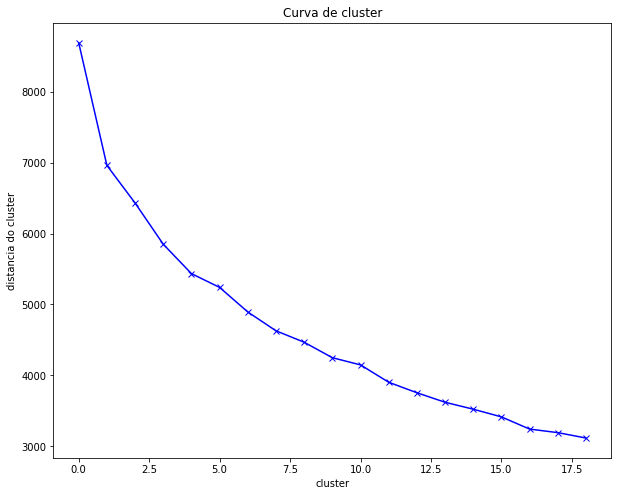

In [53]:
plt.figure(figsize=(10,8))
plt.title('Curva de cluster')
plt.plot(distancia, 'bx-')
plt.xlabel('cluster')
plt.ylabel('distancia do cluster')

In [54]:
import math
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [55]:
optimal_number_of_clusters(distancia)

6

### Clusterização

In [56]:
modelo=KMeans(n_clusters=6)
modelo.fit(D_escalonados)
centroides= modelo.cluster_centers_

In [57]:
rotulos = modelo

In [58]:
rotulos

KMeans(n_clusters=6)

In [59]:
B_PCA=pd.DataFrame(data = d_PCA, columns=['Eixo_1', 'Eixo_2'])

In [60]:
B_PCA.head()

,Eixo_1,Eixo_2
0,9.609135,-32.286937
1,-25.194939,-4.334123
2,-5.145575,20.499385
3,-7.844507,-26.308205
4,-29.875094,-27.887752


<AxesSubplot:title={'center':'grafico'}, xlabel='Eixo_1', ylabel='Eixo_2'>

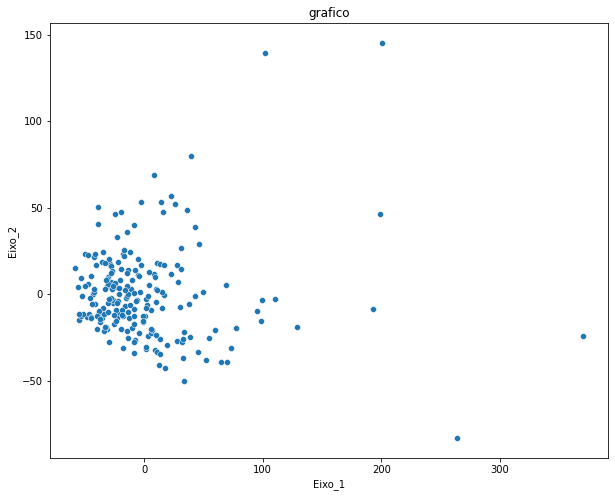

In [61]:
plt.figure(figsize=(10,8))
plt.title('grafico')
sns.scatterplot(x='Eixo_1', y = 'Eixo_2', data = B_PCA)

In [ ]:
#erro ainda não identificado 
A = pd.concat([B_PCA, pd.DataFrame({'Cluster': rotulos})])
A.head()

ValueError: ignored

ValueError: ignored

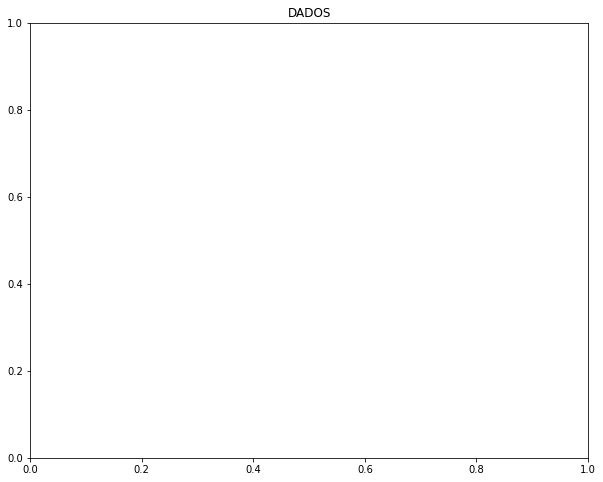

In [ ]:
paletas_cores =['red', 'green', 'blue', 'yellow', 'pink', 'gray','purple']
plt.figure(figsize=(10,8))
plt.title('DADOS')
sns.scatterplot(x='Eixo_1', y ='Eixo_2', hue='Cluster', data = A, palette=paletas_cores[0:6] )